In [66]:
# Data exploration
import pandas as pd

# Numerical
import numpy as np
import data_utility

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
#import the functions from their corresponding files
from NYC_GetCleaned_PrecinctData import getPrecinctData
from data_utility import filterData,getCount,sortValue
from Precinct_analysis import getPopulation

In [5]:
#Get cleaned data from NYC_GetCleaned_HistoricData
crimes_original = getPrecinctData()

In [6]:
crimes_original['PD_DESC'].value_counts(dropna=False)

ASSAULT 3                                                 514123
HARASSMENT,SUBD 3,4,5                                     456643
AGGRAVATED HARASSMENT 2                                   319140
HARASSMENT,SUBD 1,CIVILIAN                                270506
LARCENY,PETIT FROM STORE-SHOPL                            266261
LARCENY,PETIT FROM BUILDING,UN                            255140
MISCHIEF, CRIMINAL 4, OF MOTOR                            213103
LARCENY,PETIT FROM AUTO                                   197615
MARIJUANA, POSSESSION 4 & 5                               189734
ASSAULT 2,1,UNCLASSIFIED                                  182728
CRIMINAL MISCHIEF,UNCLASSIFIED 4                          170289
LARCENY,GRAND FROM BUILDING (NON-RESIDENCE) UNATTENDED    124219
CONTROLLED SUBSTANCE, POSSESSI                            114438
CRIMINAL MISCHIEF 4TH, GRAFFIT                            108232
ROBBERY,OPEN AREA UNCLASSIFIED                            103260
LARCENY,GRAND OF AUTO    

In [7]:
data = getCount(crimes_original,['BORO_NM','OFNS_DESC','PD_DESC','LAW_CAT_CD','PREM_TYP_DESC','LOC_OF_OCCUR_DESC'],'Count')

In [11]:
sortValue(data,'Count',False)

,BORO_NM,OFNS_DESC,PD_DESC,LAW_CAT_CD,PREM_TYP_DESC,LOC_OF_OCCUR_DESC,Count
15161,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,46413
498,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,45996
26332,BROOKLYN,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,41058
24300,BROOKLYN,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,RESIDENCE - APT. HOUSE,INSIDE,40446
9851,BRONX,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,38148
8249,BRONX,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,RESIDENCE - APT. HOUSE,INSIDE,34722
44920,MANHATTAN,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,DEPARTMENT STORE,INSIDE,32058
17805,BROOKLYN,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF, CRIMINAL 4, OF MOTOR",MISDEMEANOR,STREET,FRONT OF,30750
44904,MANHATTAN,PETIT LARCENY,"LARCENY,PETIT FROM STORE-SHOPL",MISDEMEANOR,CHAIN STORE,INSIDE,29561
28188,BROOKLYN,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,STREET,FRONT OF,28905


In [8]:
data['LOC_OF_OCCUR_DESC'].value_counts(dropna=False)

INSIDE         34402
FRONT OF       21290
REAR OF         9190
OPPOSITE OF     6510
OUTSIDE            5
Name: LOC_OF_OCCUR_DESC, dtype: int64

In [9]:
boroList = data['BORO_NM'].unique().tolist()
data.columns

Index(['BORO_NM', 'OFNS_DESC', 'PD_DESC', 'LAW_CAT_CD', 'PREM_TYP_DESC',
       'LOC_OF_OCCUR_DESC', 'Count'],
      dtype='object')

In [89]:
insideList = []
outsideList = []
inside_pop=[]
outside_pop=[]

def getValue(boroList):
    insideList.clear()
    outsideList.clear()
    inside_pop.clear()
    outside_pop.clear()
    for boro in boroList:
        data_boro = filterData(data,'BORO_NM',boro)
        inside_count = data_boro[data_boro['LOC_OF_OCCUR_DESC'] == 'INSIDE'].shape[0]
        outsideCount = data_boro[data_boro['LOC_OF_OCCUR_DESC'] != 'INSIDE'].shape[0]
        insideList.append(inside_count)
        outsideList.append(outsideCount)

    inside_sum = sum(insideList)
    outside_sum = sum(outsideList)     
        
    popPercent = getPopulation(boroList)    
    for x in range(5):
        insideList[x]=round(insideList[x]*100/inside_sum,2)
        outsideList[x]=round(outsideList[x]*100/outside_sum,2)
        inside_pop.append(round(insideList[x]/popPercent[x],2))
        outside_pop.append(round(outsideList[x]/popPercent[x],2))
    
    df_inside_out = pd.DataFrame({'Boroughs':boroList,'Inside(%)': insideList,'Outside(%)':outsideList,'Inside/Population':inside_pop,'Outside/Population':outside_pop})
    return df_inside_out 
    

In [90]:
df_inside_out = getValue(boroList)


In [91]:
df_inside_out

,Boroughs,Inside(%),Outside(%),Inside/Population,Outside/Population
0,BRONX,20.32,20.51,1.21,1.22
1,BROOKLYN,23.20,24.23,0.75,0.78
2,MANHATTAN,23.28,20.99,1.21,1.09
3,QUEENS,21.19,21.53,0.78,0.79
4,STATEN ISLAND,12.01,12.75,2.11,2.24


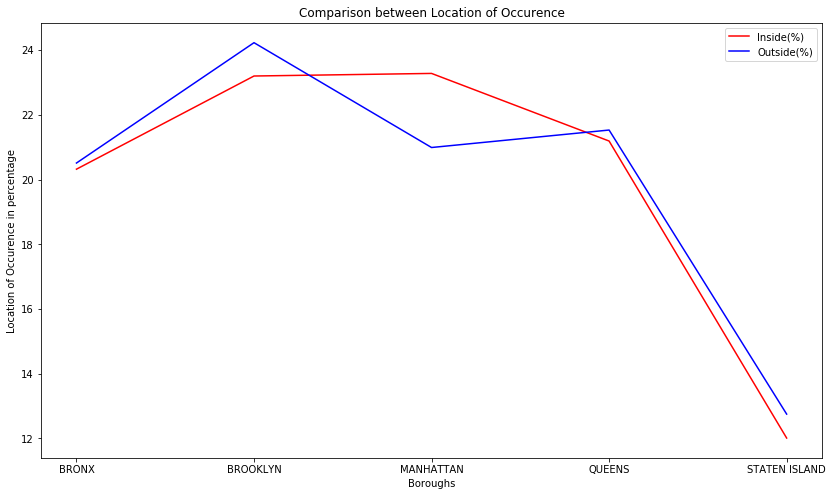

In [85]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(df_inside_out['Boroughs'],df_inside_out['Inside(%)'], color='red')
plt.plot(df_inside_out['Boroughs'],df_inside_out['Outside(%)'], color='blue')
plt.xlabel('Boroughs')
plt.ylabel('Location of Occurence in percentage')
plt.title('Comparison between Location of Occurence')
plt.legend()
plt.show()

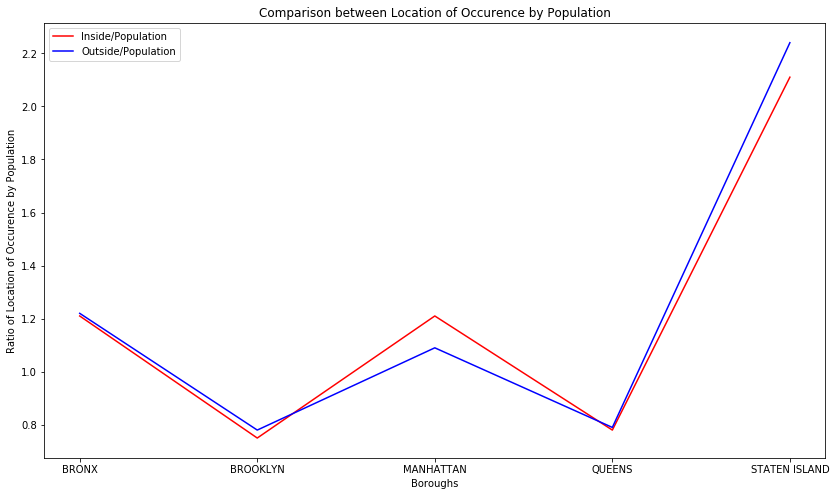

In [92]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plt.plot(df_inside_out['Boroughs'],df_inside_out['Inside/Population'], color='red')
plt.plot(df_inside_out['Boroughs'],df_inside_out['Outside/Population'], color='blue')
plt.xlabel('Boroughs')
plt.ylabel('Ratio of Location of Occurence by Population')
plt.title('Comparison between Location of Occurence by Population')
plt.legend()
plt.show()

In [65]:
column_name = 'PD_DESC'
value = 'ASSAULT 3'
filtered_data = filterData(data,column_name,value)

In [12]:
filtered_data.sort_values(by=['Count'],ascending=False)

,BORO_NM,OFNS_DESC,PD_DESC,LAW_CAT_CD,PREM_TYP_DESC,LOC_OF_OCCUR_DESC,Count
15161,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,46413
498,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,45996
15193,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,STREET,INSIDE,25263
47822,QUEENS,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,23278
32091,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,RESIDENCE - APT. HOUSE,INSIDE,22178
47830,QUEENS,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,RESIDENCE-HOUSE,INSIDE,19357
15192,BROOKLYN,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,STREET,FRONT OF,19187
526,BRONX,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,STREET,INSIDE,17767
47853,QUEENS,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,STREET,INSIDE,17597
32119,MANHATTAN,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,STREET,INSIDE,17518


In [13]:
filtered_data['LAW_CAT_CD'].value_counts(dropna=False)

MISDEMEANOR    1009
Name: LAW_CAT_CD, dtype: int64